In [1]:
# Stock Market Analysis

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import mpl_finance
import pandas_datareader.data as web
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
%matplotlib inline

In [185]:
class Stock_Analysis:
    """
    
    """
    def __init__(self,ticker='SPX',start_date='2014-01-01',end_date='2015-01-01'):
        
        self.ticker, self.start, self.end = ticker, start_date, end_date
        self.history = web.get_data_yahoo(self.ticker,self.start,self.end)
        self.history['Total Traded'] = self.history['Adj Close']*self.history['Volume']
        # daily percentega change
        self.history['Return'] = self.history['Adj Close'].pct_change(1)
        # cummulative return 
        # daily percentega change
        self.history['Cumulative Return'] = (1 + self.history['Return']).cumprod()
    
    def start_date_update(self,new_start):
        
        self.start = new_start
        self.history = web.get_data_yahoo(self.ticker,self.start,self.end)
        self.history['Total Traded'] = self.history['Adj Close']*self.history['Volume']
    
    def end_date_update(self,new_end):
        
        self.end = new_end
        self.history = web.get_data_yahoo(self.ticker,self.start,self.end)
        self.history['Total Traded'] = self.history['Adj Close']*self.history['Volume']
    
    def visualize(self):
        
        print(history.index[0])
        history = self.history
        history.dropna(inplace=True)
        
        plt.subplot(3,1,1)
        plt.title(str(self.ticker))
        history['Adj Close'].plot(label = self.ticker+' Adj Close',figsize=(12,8),lw=2,c='blue')
        plt.legend(loc='best')
        
        plt.subplot(3,1,2)
        history['Volume'].plot(label = self.ticker + ' Volume',figsize=(12,8),lw=2,c='green')
        plt.legend(loc='best')
    
        plt.subplot(3,1,3)
        history['Total Traded'].plot(label = self.ticker + ' Total Traded',figsize=(12,8),lw=2,c='red')
        plt.legend(loc='best')
        
        plt.tight_layout()
        
    def SMA_analysis(self):
        
        history = self.history
        print(history.index[0])
        history.dropna(inplace=True)
        
        
        history['MA5'] = history['Adj Close'].rolling(5).mean()
        history['MA50'] = history['Adj Close'].rolling(50).mean()
        history['MA200'] = history['Adj Close'].rolling(200).mean()
        
        history[['Adj Close','MA5','MA50','MA200']].plot(label=self.ticker,figsize=(16,8))
        plt.title('Moving Average of '+self.ticker)
        
    def Candle_Stick(self):
        
        history = self.history[-90:]

        history = history.reset_index()
        history['date_ax'] = history['Date'].apply(lambda date: date2num(date))
        history_values = [tuple(vals) for vals in history[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

        mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
        alldays = DayLocator()                  # minor ticks on the days
        weekFormatter = DateFormatter('%b %d')  
        dayFormatter = DateFormatter('%d')      
        
        fig, ax = plt.subplots(figsize=(20,8))
        fig.subplots_adjust(bottom=0.2)
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
        ax.xaxis.set_major_formatter(weekFormatter)
        ax.set_ylabel('Price')
        ax.set_title('Latest 90 days Candle Stick')
        
        candlestick_ohlc(ax, history_values, width=0.6, colorup='g',colordown='r')
        
    def Basic_Financial_Analysis(self):
        
        history = self.history
        
        plt.subplot(2,2,1)
        history['Return'].hist(bins=50,label='bins',figsize=(12,8))
        plt.legend()
        
        plt.subplot(2,2,2)
        history['Return'].plot(kind='kde',label='density')
        plt.legend()
        
        plt.subplot(2,2,3)
        history['Return'].plot(kind='box',colormap='jet')
        
        plt.subplot(2,2,4)
        history['Return'].plot(label='returns')
        plt.legend()
        
        plt.tight_layout()
        
        
    def Sharpe_Ratio(self):
        
        SR = self.history['Return'].dropna().mean()/self.history['Return'].dropna().std()
        
        return SR
        

In [186]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)
aapl = Stock_Analysis('AAPL',start,end)

In [187]:
aapl.history.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Return,Cumulative Return
Date,,,,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,51.464207,3.888388e+09,NaN,NaN
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.740776,3.363435e+09,0.005374,1.005374
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,52.315197,3.547881e+09,0.011102,1.016536
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.862103,4.206407e+09,0.010454,1.027162
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.778248,5.198979e+09,-0.001586,1.025533


In [188]:
aapl.history.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Return,Cumulative Return
Date,,,,,,,,,
2016-12-23,116.519997,115.589996,115.589996,116.519997,14249500.0,112.065674,1.596880e+09,0.001978,2.177546
2016-12-27,117.800003,116.489998,116.519997,117.260002,18296900.0,112.777390,2.063477e+09,0.006351,2.191375
2016-12-28,118.019997,116.199997,117.519997,116.760002,20905900.0,112.296501,2.347659e+09,-0.004264,2.182031
2016-12-29,117.110001,116.400002,116.449997,116.730003,15039500.0,112.267647,1.688449e+09,-0.000257,2.181470
2016-12-30,117.199997,115.430000,116.650002,115.820000,30586300.0,111.392426,3.407082e+09,-0.007796,2.164464


In [189]:
aapl.history.describe()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Return,Cumulative Return
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1.258000e+03,1257.000000,1257.000000
mean,94.224914,92.485301,93.391892,93.361719,7.731277e+07,85.832991,6.077351e+09,0.000750,1.668350
std,20.435653,20.144861,20.302658,20.298075,5.062434e+07,20.417513,3.307192e+09,0.016437,0.396442
min,57.085712,55.014286,55.424286,55.790001,1.147590e+07,49.595051,1.233849e+09,-0.123558,0.963680
25%,76.513216,75.121429,75.872145,75.879286,4.187408e+07,68.351049,3.838229e+09,-0.007331,1.328205
50%,95.605713,93.665001,94.660000,94.610714,6.316125e+07,86.844822,5.181640e+09,0.000455,1.687934
75%,111.747499,109.197498,110.355001,110.377499,9.738960e+07,104.113935,7.252871e+09,0.009791,2.023073
max,134.539993,131.399994,134.460007,133.000000,3.765300e+08,123.607811,2.617206e+10,0.088741,2.401821


2012-01-03 00:00:00


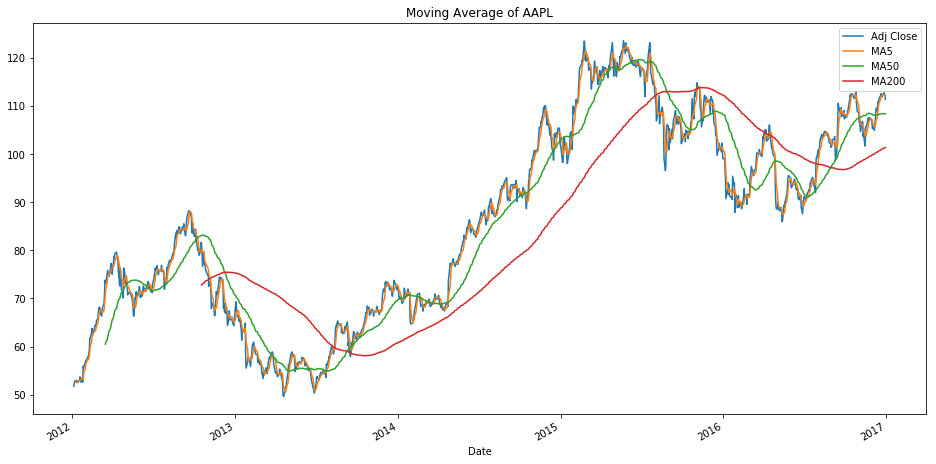

In [190]:
aapl.SMA_analysis()

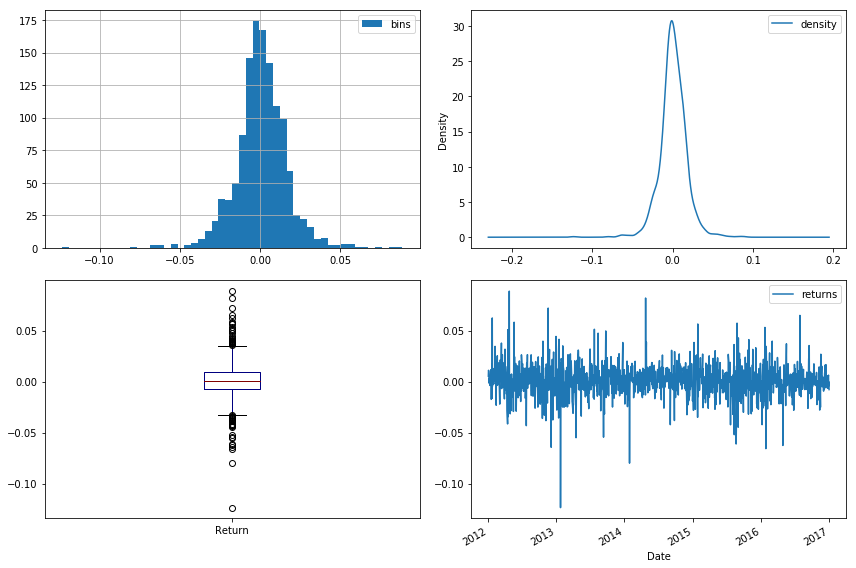

In [191]:
aapl.Basic_Financial_Analysis()

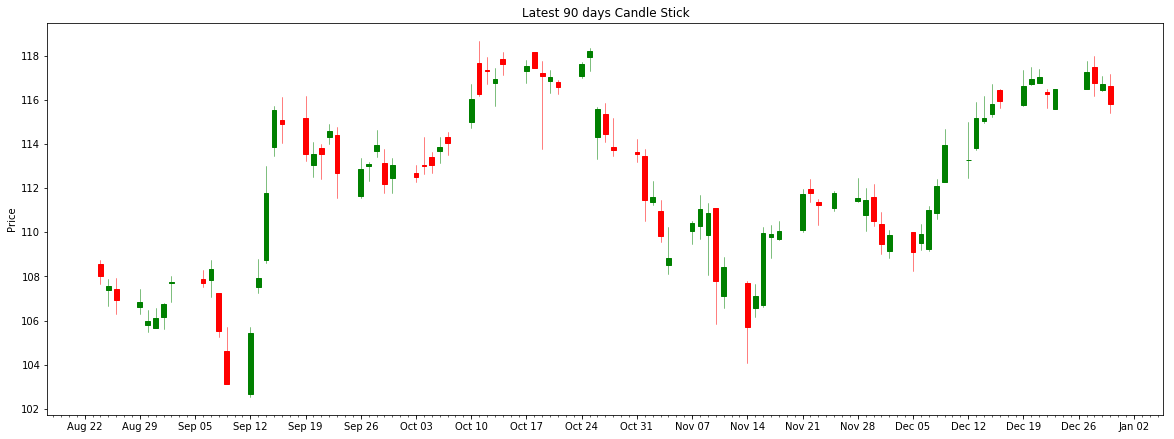

In [192]:
aapl.Candle_Stick()

In [194]:
aapl.Sharpe_Ratio()

0.04561668403780298